In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import os
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split


# Playground

In [3]:
rhc = pd.read_csv('../data/rhc.csv')
rhc.head()

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,...,meta,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid
0,1,COPD,NaN,Yes,11142,11151.0,NaN,11382,No,0,...,No,No,No,No,No,0.0,NaN,white,Under $11k,5
1,2,MOSF w/Sepsis,NaN,No,11799,11844.0,11844.0,11844,Yes,1,...,No,No,Yes,No,No,NaN,1437.0,white,Under $11k,7
2,3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0,...,No,No,No,No,No,NaN,599.0,white,$25-$50k,9
3,4,ARF,NaN,No,11146,11183.0,11183.0,11182,Yes,0,...,No,No,No,No,No,NaN,NaN,white,$11-$25k,10
4,5,MOSF w/Sepsis,NaN,No,12035,12037.0,12037.0,12036,Yes,0,...,No,No,No,No,No,NaN,64.0,white,Under $11k,11


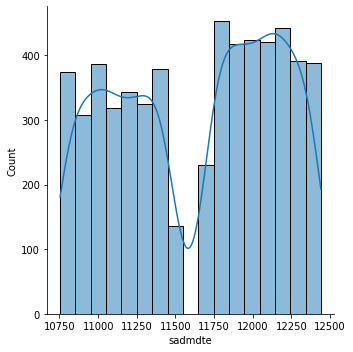

In [4]:
sns.displot(rhc[['sadmdte']], x='sadmdte', label='sadmdte', kde=True)


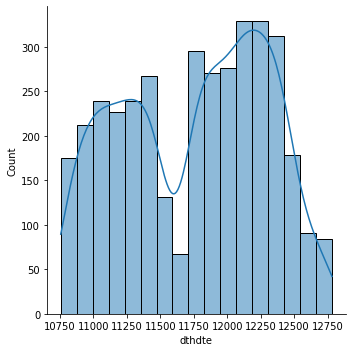

In [5]:
sns.displot(rhc[['dthdte']], x='dthdte', label='dthdte', kde=True)


In [12]:
rhc[['dthdte']] 

,dthdte
0,NaN
1,11844.0
2,NaN
3,11183.0
4,12037.0
...,...
5730,NaN
5731,12629.0
5732,12396.0
5733,11309.0


In [15]:
rhc['duration'] = rhc['dthdte'] - rhc['sadmdte']

In [16]:
rhc[['duration']]

,duration
0,NaN
1,45.0
2,NaN
3,37.0
4,2.0
...,...
5730,NaN
5731,430.0
5732,309.0
5733,23.0


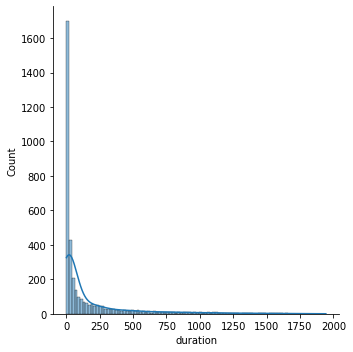

In [17]:
sns.displot(rhc[['duration']], x='duration', label='duration', kde=True)


In [18]:
rhc['duration_upto30'] = rhc['duration'].apply(lambda x: x if x < 30 else 30)


In [20]:
rhc['duration_upto30'].head()

0    30.0
1    30.0
2    30.0
3    30.0
4     2.0
Name: duration_upto30, dtype: float64

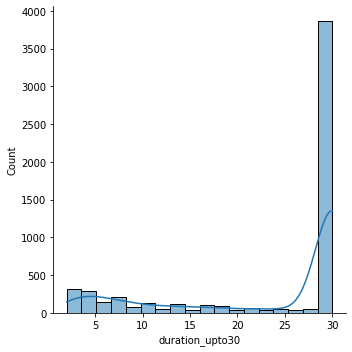

In [21]:
sns.displot(rhc[['duration_upto30']], x='duration_upto30', label='duration_upto30', kde=True)


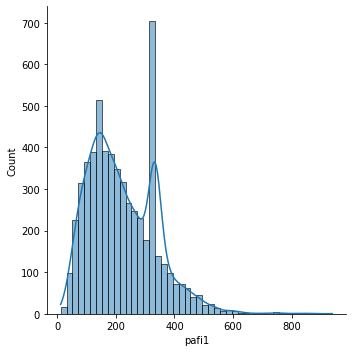

In [22]:
sns.displot(rhc[['pafi1']], x='pafi1', label='pafi1', kde=True)


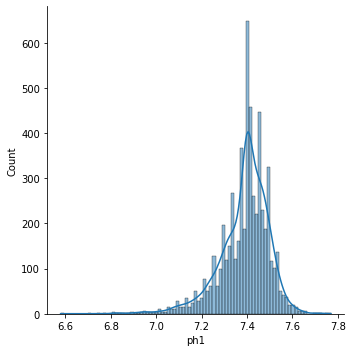

In [23]:
sns.displot(rhc[['ph1']], x='ph1', label='ph1', kde=True)


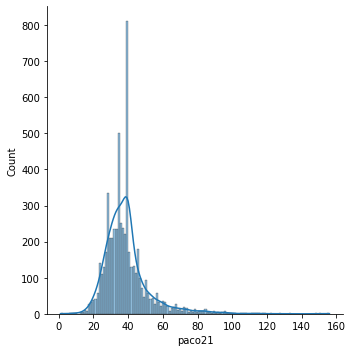

In [24]:
sns.displot(rhc[['paco21']], x='paco21', label='paco21', kde=True)

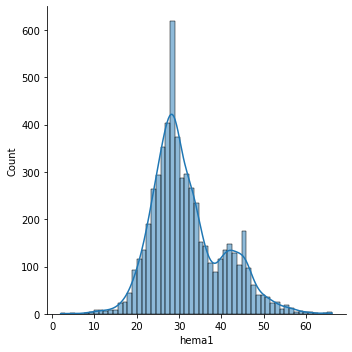

In [25]:
sns.displot(rhc[['hema1']], x='hema1', label='hema1', kde=True)

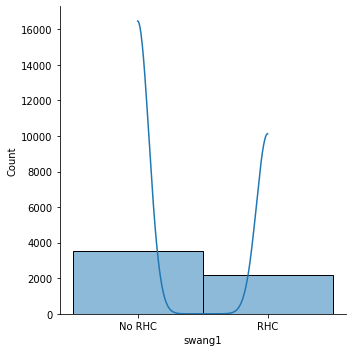

In [29]:
sns.displot(rhc[['swang1']], x='swang1', label='swang1', kde=True)


# Preprocess

In [6]:
rhc['duration'] = rhc['dthdte'] - rhc['sadmdte']
rhc['duration_'] = rhc['duration'].apply(lambda x: x if x < 30 else 500)
# not_survived = rhc['duration'] <= 30
# rhc_data = rhc[not_survived]

In [7]:
# select columns corresponding t
rhc = rhc.rename(columns={'pafi1': 'pafi1_z', 'paco21': 'paco21_z', 'ph1': 'ph1_w', 'hema1': 'hema1_w', 'swang1': 'swang1_a', 'duration_': 'duration_y'})


In [8]:
rhc_to_use = rhc.rename(columns={'pafi1_z': 'z1', 'paco21_z': 'z2', 'ph1_w': 'w1', 'hema1_w': 'w2', 'swang1_a': 'a', 'duration_y': 'y'}
                            )

In [25]:
rhc_to_use.head()

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,...,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid,y
4,5,MOSF w/Sepsis,NaN,No,12035,12037.0,12037.0,12036,Yes,0,...,No,No,No,No,NaN,64.0,white,Under $11k,11,2.0
13,14,MOSF w/Sepsis,NaN,No,11483,11491.0,11496.0,11496,Yes,0,...,No,No,No,No,0.0,NaN,white,$25-$50k,24,13.0
17,18,MOSF w/Sepsis,NaN,No,11198,11217.0,11217.0,11216,Yes,0,...,No,Yes,No,No,NaN,NaN,white,Under $11k,30,19.0
21,22,ARF,NaN,Metastatic,11119,11134.0,11134.0,11134,Yes,0,...,No,No,No,No,NaN,NaN,white,$25-$50k,35,15.0
26,27,Coma,NaN,No,11758,11764.0,11764.0,11764,Yes,0,...,No,No,No,No,NaN,NaN,black,Under $11k,43,6.0


In [26]:
rhc_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 4 to 5734
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1918 non-null   int64  
 1   cat1        1918 non-null   object 
 2   cat2        559 non-null    object 
 3   ca          1918 non-null   object 
 4   sadmdte     1918 non-null   int64  
 5   dschdte     1918 non-null   float64
 6   dthdte      1918 non-null   float64
 7   lstctdte    1918 non-null   int64  
 8   death       1918 non-null   object 
 9   cardiohx    1918 non-null   int64  
 10  chfhx       1918 non-null   int64  
 11  dementhx    1918 non-null   int64  
 12  psychhx     1918 non-null   int64  
 13  chrpulhx    1918 non-null   int64  
 14  renalhx     1918 non-null   int64  
 15  liverhx     1918 non-null   int64  
 16  gibledhx    1918 non-null   int64  
 17  malighx     1918 non-null   int64  
 18  immunhx     1918 non-null   int64  
 19  transhx     1918 non-null  

In [9]:
rhc_to_use['a'] = rhc_to_use['a'].apply(lambda x: 0. if x=='No RHC' else 1.)
rhc_to_use['a'].head()


0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: a, dtype: float64

In [10]:
rhc_to_use.dropna(axis=1, inplace=True)
rhc_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5735 non-null   int64  
 1   cat1        5735 non-null   object 
 2   ca          5735 non-null   object 
 3   sadmdte     5735 non-null   int64  
 4   lstctdte    5735 non-null   int64  
 5   death       5735 non-null   object 
 6   cardiohx    5735 non-null   int64  
 7   chfhx       5735 non-null   int64  
 8   dementhx    5735 non-null   int64  
 9   psychhx     5735 non-null   int64  
 10  chrpulhx    5735 non-null   int64  
 11  renalhx     5735 non-null   int64  
 12  liverhx     5735 non-null   int64  
 13  gibledhx    5735 non-null   int64  
 14  malighx     5735 non-null   int64  
 15  immunhx     5735 non-null   int64  
 16  transhx     5735 non-null   int64  
 17  amihx       5735 non-null   int64  
 18  age         5735 non-null   float64
 19  sex         5735 non-null  

In [11]:
key = 'cat1'

In [12]:
rhc_to_use.cat1.unique()

array(['COPD', 'MOSF w/Sepsis', 'MOSF w/Malignancy', 'ARF', 'CHF', 'Coma',
       'Cirrhosis', 'Lung Cancer', 'Colon Cancer'], dtype=object)

In [15]:
def cond(x):
    if x == 'Under $11k':
        return 0
    elif x == '$11-$25k':
        return 0.1
    elif x == '$25-$50k':
        return 0.25
    elif x == '> $50k':
        return 0.5

In [13]:
rhc_to_use.head()

,Unnamed: 0,cat1,ca,sadmdte,lstctdte,death,cardiohx,chfhx,dementhx,psychhx,...,renal,meta,hema,seps,trauma,ortho,race,income,ptid,y
0,1,COPD,Yes,11142,11382,No,0,0,0,0,...,No,No,No,No,No,No,white,Under $11k,5,500.0
1,2,MOSF w/Sepsis,No,11799,11844,Yes,1,1,0,0,...,No,No,No,Yes,No,No,white,Under $11k,7,500.0
2,3,MOSF w/Malignancy,Yes,12083,12400,No,0,0,0,0,...,No,No,No,No,No,No,white,$25-$50k,9,500.0
3,4,ARF,No,11146,11182,Yes,0,0,0,0,...,No,No,No,No,No,No,white,$11-$25k,10,500.0
4,5,MOSF w/Sepsis,No,12035,12036,Yes,0,0,0,0,...,No,No,No,No,No,No,white,Under $11k,11,2.0


In [221]:
rhc_to_use[key] = rhc_data[key]

In [16]:
rhc_to_use['income'] = rhc_to_use['income'].apply(cond)


In [243]:
rhc_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 4 to 5734
Data columns (total 53 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cat1      1918 non-null   object 
 1   ca        1918 non-null   object 
 2   cardiohx  1918 non-null   int64  
 3   chfhx     1918 non-null   int64  
 4   dementhx  1918 non-null   int64  
 5   psychhx   1918 non-null   int64  
 6   chrpulhx  1918 non-null   int64  
 7   renalhx   1918 non-null   int64  
 8   liverhx   1918 non-null   int64  
 9   gibledhx  1918 non-null   int64  
 10  malighx   1918 non-null   int64  
 11  immunhx   1918 non-null   int64  
 12  transhx   1918 non-null   int64  
 13  amihx     1918 non-null   int64  
 14  age       1918 non-null   float64
 15  sex       1918 non-null   object 
 16  edu       1918 non-null   float64
 17  surv2md1  1918 non-null   float64
 18  das2d3pc  1918 non-null   float64
 19  aps1      1918 non-null   int64  
 20  scoma1    1918 non-null   int6

In [17]:
rhc_for_x = rhc_to_use.drop(columns=['a', 'y', 'z1', 'z2', 'w1', 'w2', 'ptid'])

In [18]:
rhc_for_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5735 non-null   int64  
 1   cat1        5735 non-null   object 
 2   ca          5735 non-null   object 
 3   sadmdte     5735 non-null   int64  
 4   lstctdte    5735 non-null   int64  
 5   death       5735 non-null   object 
 6   cardiohx    5735 non-null   int64  
 7   chfhx       5735 non-null   int64  
 8   dementhx    5735 non-null   int64  
 9   psychhx     5735 non-null   int64  
 10  chrpulhx    5735 non-null   int64  
 11  renalhx     5735 non-null   int64  
 12  liverhx     5735 non-null   int64  
 13  gibledhx    5735 non-null   int64  
 14  malighx     5735 non-null   int64  
 15  immunhx     5735 non-null   int64  
 16  transhx     5735 non-null   int64  
 17  amihx       5735 non-null   int64  
 18  age         5735 non-null   float64
 19  sex         5735 non-null  

In [270]:
rhc_for_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 4 to 5734
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cat1      1918 non-null   object 
 1   ca        1918 non-null   object 
 2   cardiohx  1918 non-null   int64  
 3   chfhx     1918 non-null   int64  
 4   dementhx  1918 non-null   int64  
 5   psychhx   1918 non-null   int64  
 6   chrpulhx  1918 non-null   int64  
 7   renalhx   1918 non-null   int64  
 8   liverhx   1918 non-null   int64  
 9   gibledhx  1918 non-null   int64  
 10  malighx   1918 non-null   int64  
 11  immunhx   1918 non-null   int64  
 12  transhx   1918 non-null   int64  
 13  amihx     1918 non-null   int64  
 14  age       1918 non-null   float64
 15  sex       1918 non-null   object 
 16  edu       1918 non-null   float64
 17  surv2md1  1918 non-null   float64
 18  das2d3pc  1918 non-null   float64
 19  aps1      1918 non-null   int64  
 20  scoma1    1918 non-null   int6

In [267]:
rhc_for_x['income'] = rhc_data['income']

In [21]:
# generate x
from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(rhc_for_x)
x_arr = []
for col in rhc_for_x:
    if rhc_for_x[col].dtypes != 'float64':
        enc = OneHotEncoder(handle_unknown='ignore')
        enc.fit(rhc_for_x[[col]])
        x_arr.append(enc.transform(rhc_for_x[[col]]).toarray())
    else:
        x_arr.append(rhc_for_x[[col]].values)
x_np = np.concatenate(x_arr, axis=-1)

In [22]:
x_np.shape

(5735, 8580)

In [37]:
a_np = np.array(rhc_to_use['a'])
y_np = np.array(rhc_to_use['y'])
z_np = np.stack([np.array(rhc_to_use['z1']),np.array(rhc_to_use['z2'])], axis=-1)
w_np = np.stack([np.array(rhc_to_use['w1']), np.array(rhc_to_use['w2'])], axis=-1)


In [274]:
!pwd

/Users/yuchenzhu/python_projects/ml/Dual-KV/MMR/simulation


In [275]:
np.savez('rhc_for_sim_fitting.npz', x=x_np, a=a_np.reshape(-1,1), y=y_np, z1=z_np[:,0].reshape(-1,1), z2=z_np[:,1].reshape(-1,1), w=w_np)


In [38]:
z_np

array([[478.     ,  17.     ],
       [171.40625,  25.     ],
       [161.     ,  36.     ],
       ...,
       [333.3125 ,  40.     ],
       [ 60.     ,  81.     ],
       [106.     ,  47.     ]])

In [44]:
standard_z = preprocessing.scale(z_np)
standard_w = preprocessing.scale(w_np)
standard_y = preprocessing.scale(y_np)
standard_a = a_np

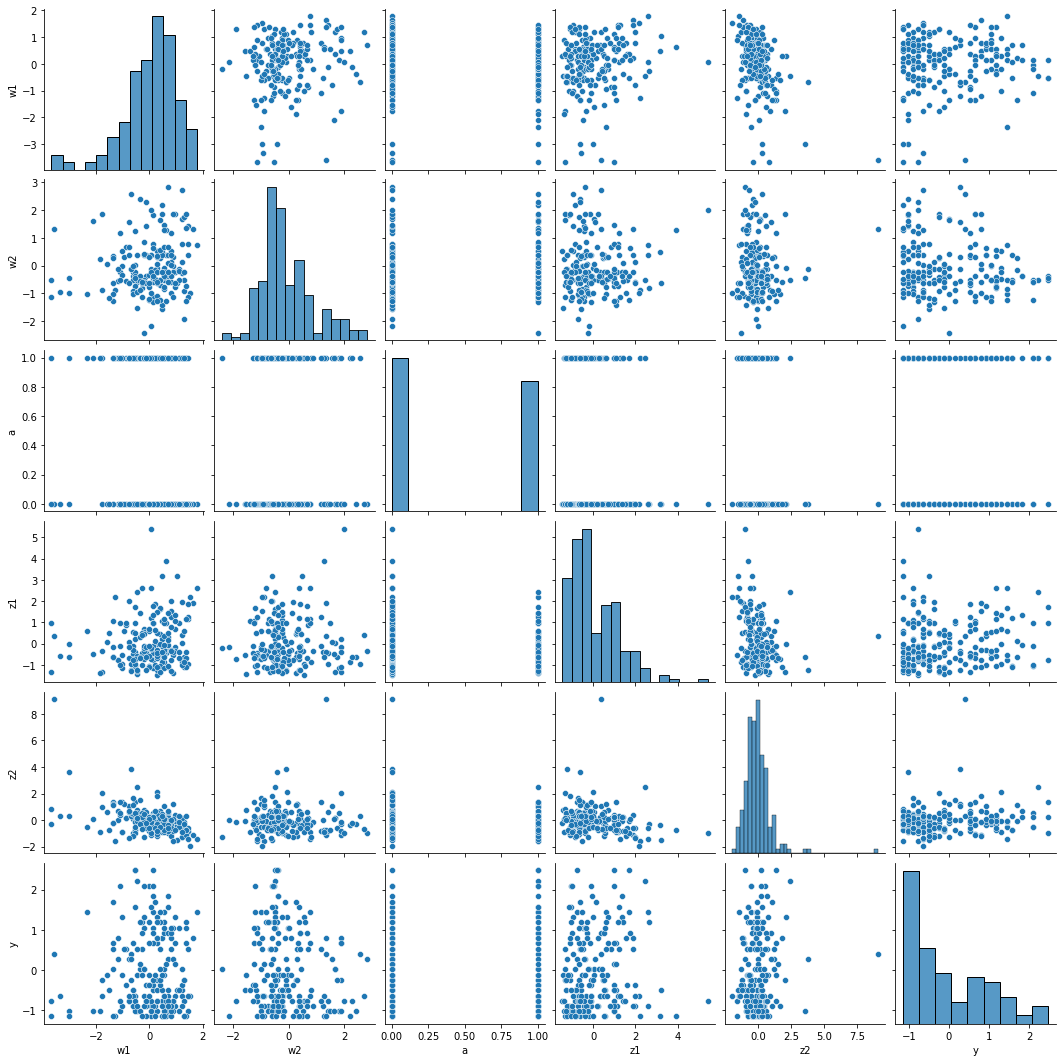

In [96]:
Data = pd.DataFrame([standard_w[:200, 0], standard_w[:200, 1], standard_a[:200], standard_z[:200,0], standard_z[:200,1], standard_y[:200]]).T
Data.columns = ['w1', 'w2', 'a', 'z1', 'z2', 'y']
sns.pairplot(Data)

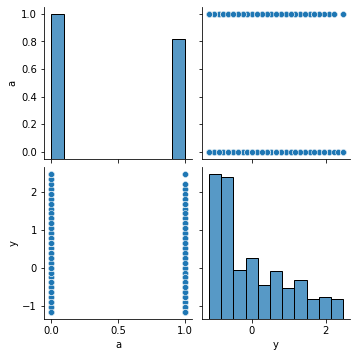

In [98]:
Data = pd.DataFrame([standard_a[:500], standard_y[:500]]).T
Data.columns = ['a', 'y']
sns.pairplot(Data)

In [ ]:
# todo: extract X

# Constructing $U$

## Regress $W - N(0,\sigma)$ onto $Z$

In [62]:
W_test.shape

(633, 2)

In [76]:
scale_w = 0.001
scale_z = 0.1
N_w = np.random.normal(0, scale_w, standard_w.shape)
N_z = np.random.normal(0, scale_z, standard_z.shape)
W_perturb = standard_w - N_w

# Wperturb_tr, Wperturb_te, Z_tr, Z_te = train_test_split(
#     W_perturb, standard_z, test_size=0.33, random_state=42)

WZ1_regressor = linear_model.LinearRegression()
WZ1_regressor.fit(W_perturb, standard_z[:, 0])
WZ2_regressor = linear_model.LinearRegression()
WZ2_regressor.fit(W_perturb, standard_z[:, 1])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

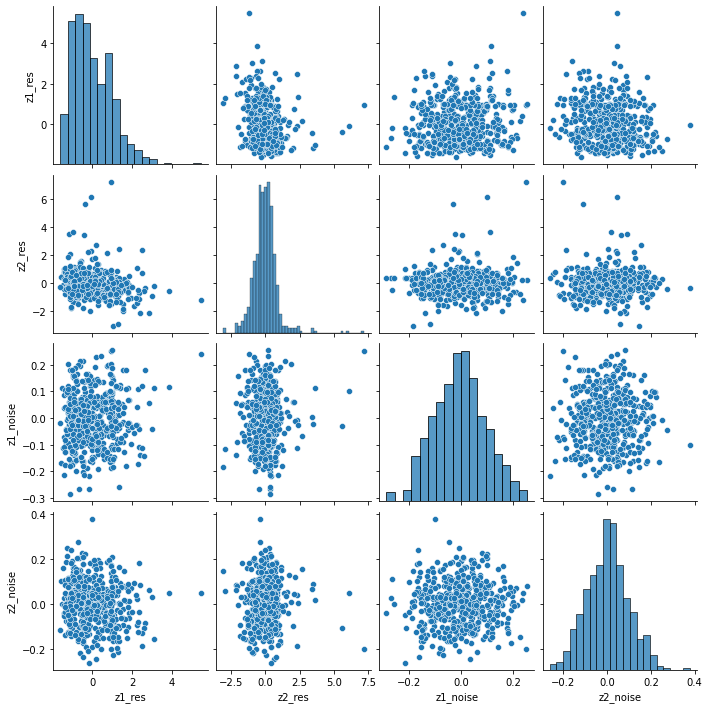

In [77]:
z1_preds = WZ1_regressor.predict(W_perturb)
z2_preds = WZ2_regressor.predict(W_perturb)
z1_res = standard_z[:, 0] - z1_preds
z2_res = standard_z[:, 1] - z2_preds

D = pd.DataFrame([z1_res[:500], z2_res[:500], N_z[:500,0], N_z[:500, 1]]).T
D.columns = ['z1_res', 'z2_res', 'z1_noise', 'z2_noise']
sns.pairplot(D)

In [78]:
WZ2_regressor.coef_

array([-0.48081013,  0.13535598])

In [79]:
WZ1_regressor.coef_

array([ 0.14801364, -0.02419958])

# Just fit a fully observed model

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [294]:
def load_split_and_standardise(file_path):
    data = np.load('rhc_for_sim_fitting.npz')
    u, a, w, z, y, x = data['z1'], data['a'], data['w'], data['z2'], data['y'], data['x']
    
    train, test = {}, {}
    split = int(u.shape[0]*0.66)
    for name, datalet in [('u', u), ('a', a), ('w', w),('z', z),('y', y), ('x', x)]:
        train_data, test_data = datalet[:split], datalet[split:]
        train[name], test[name] = train_data, test_data
        
    transforms = {}
    tr_data_scaled = {'a': train['a'], 'y': train['y']}
    
    for name in ['u', 'w', 'z', 'x']:
        scaler = preprocessing.StandardScaler()
        data_scaled = scaler.fit_transform(train[name])
        transforms[name] = scaler
        tr_data_scaled[name] = data_scaled
 
    return tr_data_scaled, train, test, transforms
    
file_path = 'rhc_for_sim_fitting.npz'
tr_data_scaled, train, test, transforms = load_split_and_standardise(file_path)

In [ ]:
def fit_x(x):
    model = None
    return model

def fit_structural_eqs(tr_data, te_data, nonlinear_regressor, kwargs4regressor):
    u,a,w,z,y,x = tr_data['u'], tr_data['a'], tr_data['w'], tr_data['z'], tr_data['y'], tr_data['x']
    f_xu = linear_model.LinearRegression()
    f_uxz = linear_model.LinearRegression(), ux_tr = np.concatenate([u, x], axis=-1), ux_te = np.concatenate([te_data['u'], te_data['x']], axis=-1)
    f_uxw = linear_model.LinearRegression()
    f_xu.fit(x,u), xu_test_err = f_xu.score(te_data['x'], te_data['u'].squeeze())
    f_uxz.fit(np.concatenate([u, x], axis=-1), z), uxz_test_err = f_uxz.score(ux_te, te_data['z'], axis=-1)
    f_uxw.fit(np.concatenate([u, x], axis=-1), w), uxw_test_err = f_uxw.score(ux_te, te_data['w'], axis=-1)
    
    f_uzxa = nonlinear_regressor(**kwargs4regressor), uzx_tr = np.concatenate([u,z,x], axis=-1), uzx_te = np.concatenate([te_data['u'],te_data['z'],te_data['x']], axis=-1)
    f_uzxa.fit(np.concatenate([u,z,x], axis=-1), a), uzxa_test_err = f_uzxa.score(uza_te, te_data['a'], axis=-1)
    
    f_uwaxy = nonlinear_regressor(**kwargs4regressor), uwax_tr = np.concatenate([u,w,a,x], axis=-1), uwax_te = np.concatenate([te_data['u'],te_data['w'],te_data['a'],te_data['x']], axis=-1)
    f_uwaxy.fit(np.concatenate([u,w,a,x], axis=-1), y), uwaxy_test_err = f_uwaxy.score()
    
    return f_xu, f_uxz, f_uxw, f_uzxa, f_uwxay


3

In [284]:
scaler = preprocessing.StandardScaler()
scaler.fit_transform(np.array([[1,2],[3,4]]))
scaler.inverse_transform(np.array([[-1.,-1.], [1.,1.]]))

array([[1., 2.],
       [3., 4.]])

In [109]:
u = standard_z[:, 0].reshape(-1,1)
z = standard_z[:, 1].reshape(-1,1)
w = standard_w.reshape(-1,2)
y = standard_y
a = standard_a.reshape(-1,1)
x = None

In [110]:
f_z = linear_model.LinearRegression()
f_z.fit(u, z)
f_w = linear_model.LinearRegression()
f_w.fit(u, w)
f_a = tree.DecisionTreeClassifier()
f_a.fit(np.concatenate([u,z], axis=-1), a)
f_y = RandomForestRegressor()
f_y.fit(np.concatenate([u,z,a], axis=-1), y)

/Users/yuchenzhu/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [103]:
uz = np.stack([u,z], axis=-1)

In [104]:
uz[:3]

array([[ 2.20456489, -1.608883  ],
       [-0.36517122, -0.96976444],
       [-0.4523919 , -0.09097643]])

# Scrap

In [86]:
import torch

In [87]:
a = torch.as_tensor(np.array([1.])).float()

In [88]:
a.requires_grad

False

In [89]:
a.requires_grad = True

In [94]:
a.requires_grad 

True

In [95]:
a = torch.as_tensor(1., requires_grad=True).float()

TypeError: as_tensor() got an unexpected keyword argument 'requires_grad'

In [93]:
a.requires_grad = True